Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Pour analyser les données, afin de ne pas être obligés à chaque ouverture de run tout le code, on utilise directement le fichier csv créé.

In [2]:
final_data = pd.read_csv("Base_finale.csv")

#Partie 1: Statistiques descriptives

Avant de commencer cette partie, il nous parait pertinent de distinguer les tops fnac, babelio et des bibliothèques de Paris des données récupérées sur Livraddict et sur Wikipedia sur les prix littéraires. En effet, les trois premières bases mentionnées présentent les livres les plus populaires, c'est-à-dire les plus lus. Sur les bases Livraddict et Wikipedia, la liste de livres correspond aux livres jugés de meilleure qualité, que ce soit par les internautes ou par les spécialistes.

##A) Analyse des prix littéraires

Plusieurs questions se posent à nous. Les livres populaires sont-ils aussi les livres les mieux notés ? Cela varie-t-il selon les plateformes considérées ? C'est-à-dire est-ce que les livres populaires sont-ils mieux représentés dans les listes de prix littéraires ou dans les classements de qualité faits par les internautes ? 

Tout d'abord, déterminons le nombre de livres populaires qui sont aussi dans les bases des prix littéraires et du classement des utilisateurs de Livraddict.

In [3]:
# on modifie la table pour créer une fonction qui renvoie quel type d'entité a reconnu la qualité du livre populaire 
# selon s'il est sur la base des prix, celle Livraddict, ou les deux

def reconnu(row):
    if row['prix_19_23'] == 1 and ((row['top_fnac_1'] == 1) or (row['top_babelio'] == 1) or (row['Top_bibliothèque'] == 1)) and (row['top_livraddict'] == 0):
        reconnu = 'Critique'
    elif row['prix_19_23'] == 0 and ((row['top_fnac_1'] == 1) or (row['top_babelio'] == 1) or (row['Top_bibliothèque'] == 1)) and (row['top_livraddict'] == 1):
        reconnu = 'Internautes'
    elif (row['prix_19_23'] == 1) and (row['top_livraddict'] == 1) and ((row['top_fnac_1'] == 1) or (row['top_babelio'] == 1) or (row['Top_bibliothèque'] == 1)):
        reconnu = 'Critique et internautes'
    else:
        reconnu = 'Aucun'
    return reconnu

In [4]:
final_data['Reconnu_par'] = final_data.apply(reconnu, axis=1)

In [5]:
prix_counts = final_data['Reconnu_par'].value_counts()
prix_proportions = final_data['Reconnu_par'].value_counts(normalize=True) * 100

print("Nombre de livres dont la qualité est reconnue institutionnellement et par qui:")
print(prix_counts)
print("\nProportion de livres dont la qualité est reconnue institutionnellement et par qui (%):")
print(prix_proportions)

Nombre de livres dont la qualité est reconnue institutionnellement et par qui:
Reconnu_par
Aucun          474
Critique        11
Internautes      6
Name: count, dtype: int64

Proportion de livres dont la qualité est reconnue institutionnellement et par qui (%):
Reconnu_par
Aucun          96.537678
Critique        2.240326
Internautes     1.221996
Name: proportion, dtype: float64


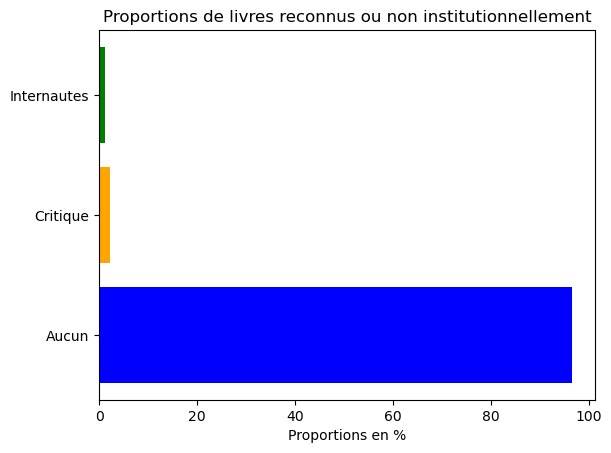

In [6]:
# Visualisation des prix littéraires
categories = ["Aucun", "Critique", "Internautes"]
plt.barh(categories, prix_proportions, color=['blue', 'orange', 'green'])
#plt.xscale('log')  # On applique l'échelle logarithmique pour que les petites valeurs soient mieux représentées

plt.xlabel('Proportions en %')
plt.title('Proportions de livres reconnus ou non institutionnellement')
plt.savefig("reco_institutionnelle.png")
plt.show()


On observe  une proportion très petite de livres reconnus institutionnellement parmi les plus populaires.

On pourrait ainsi penser qu'il y a une dissociation entre les livres les plus lus et les mieux notés sur les applications et ceux ayant un prix. L'intersection est presque vide. On peut alors postuler d'une part que les livres de type best-sellers ne sont pas ceux qui sont primés ( les livres les plus primés illustrant le mécanisme de distinction théorisé par Bourdieu des élites). D'autre part, pour les autres bases, l'échantillon des lecteurs consignant les livres qu'ils ont lu et les notant dans les applications dédiées à cela n'est peut-être pas du tout représentatif. Ils pourraient par exemple venir majoritairement de milieux sociaux plutôt extérieurs à la culture légitime et donc du fait de cette caractéristique ne pas s'intéresser aux livres primés et avoir des critères de notation différents.

Nous pensions que la deuxième hypothèse était probable, sauf qu'étonnamment, il y a encore moins de livres populaires parmi les mieux notés sur Livraddict. Sauf que cela est peut-être du au fait qu'il y a bien plus de livres renseignés comme ayant un prix sur Livraddict. De plus, il n'y avait de classement tel disponible sur Livraddict que pour 2023 alors que nous avons pu prendre tous les prix littéraires entre 2019 et 2023 lors du scrapping wikipedia. La comparaison de ces deux bases n'est donc peut-être pas pertinente.

Avant de passer à une étape ultérieure, observons quand même s'il y a une intersection entre les livres jugés de qualités sur Livraddict et ceux jugés de qualités par les professionnels octroyant les prix littéraires. Gardons néanmoins à l'esprit le fait que la base de Livraddict ne comporte que des livres publiés en 2023. Ainsi pour comparer les deux bases, ne conservons que les prix octroyés en 2023.

In [7]:
# on crée une base avec que les livres reconnus pour voir l'intersection sans s'occuper du reste
df_reconnus = final_data[((final_data['prix_19_23'] == 1) & (final_data['Année'] == 2023)) | (final_data['top_livraddict'] == 1)]

In [8]:
def reconnu_bis(row):
    if row['prix_19_23'] == 1 and (row['top_livraddict'] == 0):
        reconnu = 'Critique'
    elif row['prix_19_23'] == 0 and (row['top_livraddict'] == 1):
        reconnu = 'Internautes'
    elif (row['prix_19_23'] == 1) and (row['top_livraddict'] == 1):
        reconnu = 'Critique et internautes'
    else:
        reconnu = 'Aucun'
    return reconnu

In [9]:
df_reconnus.loc[:, 'Reconnu_par'] = df_reconnus.apply(reconnu_bis, axis=1)

In [10]:
commun = df_reconnus['Reconnu_par'].value_counts()
commun_proportions = df_reconnus['Reconnu_par'].value_counts(normalize=True) * 100

print("Nombre de livres en 2023 parmi les reconnus ayant obtenu un prix ou des bonnes notes d'internautes:")
print(commun)
print("\nProportion de livres en 2023 parmi les reconnus ayant obtenu un prix ou des bonnes notes d'internautes (%):")
print(commun_proportions)

Nombre de livres en 2023 parmi les reconnus ayant obtenu un prix ou des bonnes notes d'internautes:
Reconnu_par
Internautes    85
Critique       53
Name: count, dtype: int64

Proportion de livres en 2023 parmi les reconnus ayant obtenu un prix ou des bonnes notes d'internautes (%):
Reconnu_par
Internautes    61.594203
Critique       38.405797
Name: proportion, dtype: float64


En 2023, il n'y a pas d'intersection entre les livres les mieux notés sur Livraddict et ceux ayant obtenus un prix. Cette observation est très intéressante. On pourrait penser que les livres ne se voient pas forcément accordés un prix l'année de leur parution, sauf que pour de nombreux livres de la base Wikipedia, l'année de parution coincide avec l'année à laquelle le livre a reçu son ou ses prix.

In fine, on peut surtout en conclure que nos bases sur la reconnaissance institutionnelle des livre sont complémentaires. Elles permettent d'explorer deux formes de reconnaissance, et d'élargir notre analyse sur le lien entre note des livres et popularité.

Ainsi, par la suite, nous allons surtout analyser une par une les bases de popularité, et les comparer entre elles. 

Tout d'abord, visualisons de manière générale la base. Tout d'abord, il est utile de savoir combien de livres proviennent de quelles bases, de voir quelle base fournit le plus de livres populaires, afin de pouvoir mieux interpréter les données.

In [11]:
df_popularity = final_data[
    (final_data['top_fnac_1'] == 1) | 
    (final_data['top_fnac_2_plus'] == 1) | 
    (final_data['top_babelio'] == 1) | 
    (final_data['Top_bibliothèque'] == 1)
]

In [12]:
# Comptage et proportions pour chaque top
tops = ['top_fnac_1', 'top_babelio', 'Top_bibliothèque']
for top in tops:
    print(f"\nAnalyse pour {top}:")
    counts = df_popularity[top].value_counts()
    proportions = df_popularity[top].value_counts(normalize=True) * 100
    print(f"Nombre de livres :\n{counts}")
    print(f"Proportions (%):\n{proportions}")


Analyse pour top_fnac_1:
Nombre de livres :
top_fnac_1
0.0    96
1.0    69
Name: count, dtype: int64
Proportions (%):
top_fnac_1
0.0    58.181818
1.0    41.818182
Name: proportion, dtype: float64

Analyse pour top_babelio:
Nombre de livres :
top_babelio
0.0    141
1.0     24
Name: count, dtype: int64
Proportions (%):
top_babelio
0.0    85.454545
1.0    14.545455
Name: proportion, dtype: float64

Analyse pour Top_bibliothèque:
Nombre de livres :
Top_bibliothèque
1.0    86
Name: count, dtype: int64
Proportions (%):
Top_bibliothèque
1.0    100.0
Name: proportion, dtype: float64


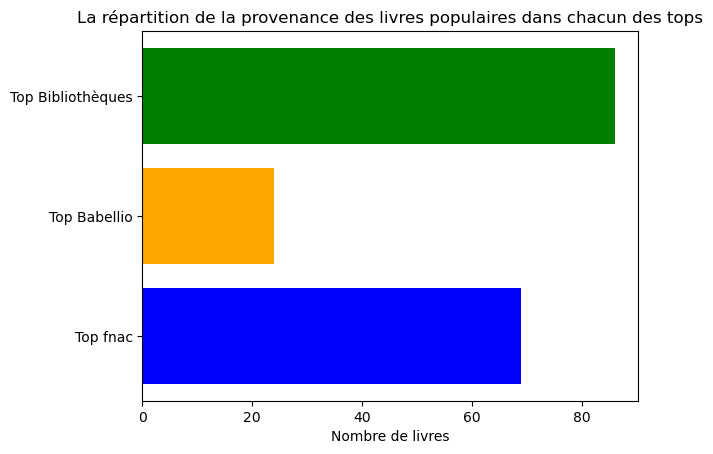

In [13]:
# Visualisation 
categories = ["Top fnac", "Top Babellio", "Top Bibliothèques"]
values = [69, 24, 86]
plt.barh(categories, values, color=['blue', 'orange', 'green'])

plt.xlabel('Nombre de livres')
plt.title('La répartition de la provenance des livres populaires dans chacun des tops')
plt.show()

On voit que la base des livres les plus empruntés en bibliothèque domine numériquement nos données, même si la différence avec de taille entre cette dernière et celle des bestsellers fnac n'est pas si grande.

Regardons encore une fois s'il y a des croisement, des livres dans plusieurs tops.

In [14]:
tops_columns = ['top_fnac_1', 'top_babelio', 'Top bibliothèque']
final_data['multiple_tops'] = (final_data[tops_columns].sum(axis=1) >= 2).astype(int)
multiple_tops_counts = final_data['multiple_tops'].value_counts()
multiple_tops_proportions = final_data['multiple_tops'].value_counts(normalize=True) * 100

print("Nombre de livres présents dans au moins deux tops :")
print(multiple_tops_counts)
print("\nProportion de livres présents dans au moins deux tops (%):")
print(multiple_tops_proportions)

Nombre de livres présents dans au moins deux tops :
multiple_tops
0    477
1     14
Name: count, dtype: int64

Proportion de livres présents dans au moins deux tops (%):
multiple_tops
0    97.148676
1     2.851324
Name: proportion, dtype: float64


Il n'y a que 14 livres en commun entre les tops. Encore une fois, c'est peu, même si mieux qu'entre les bases Wikipedia et Livraddict. Ces classements de popularité sont donc plus complémentaires, ce qui peut-être très intéressant dans le cadre de notre analyse. En effet, on peut supposer qu'il y a une différence d'échantillonnage entre les individus dont les lectures sont représentées par les bestsellers, ceux qui empruntent le plus dans les bibliothèque et ceux qui notent leurs lectures sur Babelio. On peut d'une part supposer une différence d'âge, notamment avec éventuellement des clients de bibliothèque plus jeunes, mais aussi des différences de milieux sociaux et de rapport à la lecture et à la littérature en tant qu'art. En effet, les utilisateurs de Babelio nous paraissent intuitivement des lecteurs plus réguliers, qui cherchent sûrement à se démarquer en ayant des lectures peut-être plus originales, par un mécanisme de distinction de la masse. Bien sûr, cela reste des suppositions, que nous devrions, si nous poussions ce projet plus loin, vérifier.

Toutefois, ces constats restent tout de même utiles puisqu'ils nous permettent de juger pertinent de regarder dans quel type de base de livres populaire il y a le plus de livres bien notés ou récompensés par un prix.

Avant cela, nous pensons qu'il est nécessaire de mettre en avant l'existence d'une variable dans la base fnac indiquant si le livre a été un bestseller pendant plus d'un mois. Observons donc la proportion de livre au sein de la base fnac qui restent longtemps des bestsellers.

Sans surprise, il y a une nette sous-représentation des livres issus de Babelio. Les livres issus des bases de données des bibliothèques de Paris sont les plus nombreux.

In [15]:
final_fnac = final_data[(final_data['top_fnac_1'] == 1) | (final_data['top_fnac_2_plus'] == 1)]

In [16]:
bestbestsellers = final_fnac['top_fnac_2_plus'].value_counts()
bestbestsellers_proportions = final_fnac['top_fnac_2_plus'].value_counts(normalize=True) * 100

print("Nombre de livres ayant été plus d'1 mois bestsellers en 2023:")
print(bestbestsellers)
print("\nProportion de livres ayant été plus d'1 mois bestsellers en 2023 parmi les bestsellers (%):")
print(bestbestsellers_proportions)

Nombre de livres ayant été plus d'1 mois bestsellers en 2023:
top_fnac_2_plus
0.0    39
1.0    30
Name: count, dtype: int64

Proportion de livres ayant été plus d'1 mois bestsellers en 2023 parmi les bestsellers (%):
top_fnac_2_plus
0.0    56.521739
1.0    43.478261
Name: proportion, dtype: float64


On voit donc que à peu près 43% des bestsellers le reste pendant plus d'un mois.

Répondons donc maintenant à notre question: dans quel type de base indiquant la popularité y-a-t-il le plus de livre considérés de qualité ?

Tout d'abord, procédons à une analyse un peu plus globale.

In [17]:
df_popularity.loc[:, 'Reconnu_par'] = df_popularity.apply(reconnu_bis, axis=1)

In [18]:
reconnus = df_popularity['Reconnu_par'].value_counts()
reconnus_proportions = df_popularity['Reconnu_par'].value_counts(normalize=True) * 100

print("Nombre de livres en 2023 parmi les plus populaires ayant obtenu un prix ou des bonnes notes d'internautes:")
print(reconnus)
print("\nProportion de livres en 2023 parmi les plus populaires ayant obtenu un prix ou des bonnes notes d'internautes (%):")
print(reconnus_proportions)

Nombre de livres en 2023 parmi les plus populaires ayant obtenu un prix ou des bonnes notes d'internautes:
Reconnu_par
Aucun          148
Critique        11
Internautes      6
Name: count, dtype: int64

Proportion de livres en 2023 parmi les plus populaires ayant obtenu un prix ou des bonnes notes d'internautes (%):
Reconnu_par
Aucun          89.696970
Critique        6.666667
Internautes     3.636364
Name: proportion, dtype: float64


Si le nombre de livres populaires ayant reçu un prix ou étant parmi les livres les plus notés sur Livraddict reste le même, faire l'analyse dans ce sens et non pas dans le sens inverse nous permet d'avoir une meilleure idée de la proportion de livres populaires salués de la critique. On trouve qu'il y a en proportion plus de livres populaires salués par la critique que de livres primés populaire. Toutefois, cela est peut-être dû au fait que nous disposons de plus de données sur les livres primés grâce à wikipedia que de données sur les livres populaires. Pour que l'analyse soit plus rigoureuse, il faudrait raisonner au moins à échantillon équivalent. De plus, nous n'avons pas distingué les "prix nobles" des prix moins considérés par l'élite littéraire. Il se pourrait que cette intersection ne s'explique que par l'existence de prix "moins noble" pour ce qui est de la base wikipedia. Essayons de vérifier cela.

AFFICHONS LES NOMs DES PRIX => je vais les remettre dans la base pour faire ça !!

Les bestsellers fnac et leur reconnaissance:

In [19]:
final_fnac.loc[:, 'Reconnu_par'] = final_fnac.apply(reconnu_bis, axis=1)

In [20]:
reconnus = final_fnac['Reconnu_par'].value_counts()
reconnus_proportions = final_fnac['Reconnu_par'].value_counts(normalize=True) * 100

print("Nombre de livres en 2023 parmi les bestsellers fnac ayant obtenu un prix ou des bonnes notes d'internautes:")
print(reconnus)
print("\nProportion de livres en 2023 parmi les bestsellers fnac ayant obtenu un prix ou des bonnes notes d'internautes (%):")
print(reconnus_proportions)

Nombre de livres en 2023 parmi les bestsellers fnac ayant obtenu un prix ou des bonnes notes d'internautes:
Reconnu_par
Aucun          60
Internautes     5
Critique        4
Name: count, dtype: int64

Proportion de livres en 2023 parmi les bestsellers fnac ayant obtenu un prix ou des bonnes notes d'internautes (%):
Reconnu_par
Aucun          86.956522
Internautes     7.246377
Critique        5.797101
Name: proportion, dtype: float64


Regardons s'il y a une surreprésentation des livres reconnus institutionnellement parmi les bestsellers s'étant maintenus au sommet des ventes pendant plusieurs mois.

In [21]:
best_fnac = final_fnac[final_fnac['top_fnac_2_plus']==1]

In [22]:
best_fnac.loc[:, 'Reconnu_par'] = best_fnac.apply(reconnu_bis, axis=1)

In [23]:
reconnus = best_fnac['Reconnu_par'].value_counts()
reconnus_proportions = best_fnac['Reconnu_par'].value_counts(normalize=True) * 100

print("Nombre de livres en 2023 parmi les bestsellers fnac les plus vendus ayant obtenu un prix ou des bonnes notes d'internautes:")
print(reconnus)
print("\nProportion de livres en 2023 parmi les bestsellers fnac les plus vendus ayant obtenu un prix ou des bonnes notes d'internautes (%):")
print(reconnus_proportions)

Nombre de livres en 2023 parmi les bestsellers fnac les plus vendus ayant obtenu un prix ou des bonnes notes d'internautes:
Reconnu_par
Aucun          24
Critique        4
Internautes     2
Name: count, dtype: int64

Proportion de livres en 2023 parmi les bestsellers fnac les plus vendus ayant obtenu un prix ou des bonnes notes d'internautes (%):
Reconnu_par
Aucun          80.000000
Critique       13.333333
Internautes     6.666667
Name: proportion, dtype: float64


On voit en effet que parmi ces "super bestsellers", la proportion de livres salués par la critique ou par la communauté des internautes est plus importante. Représentons tout ça graphiquement.

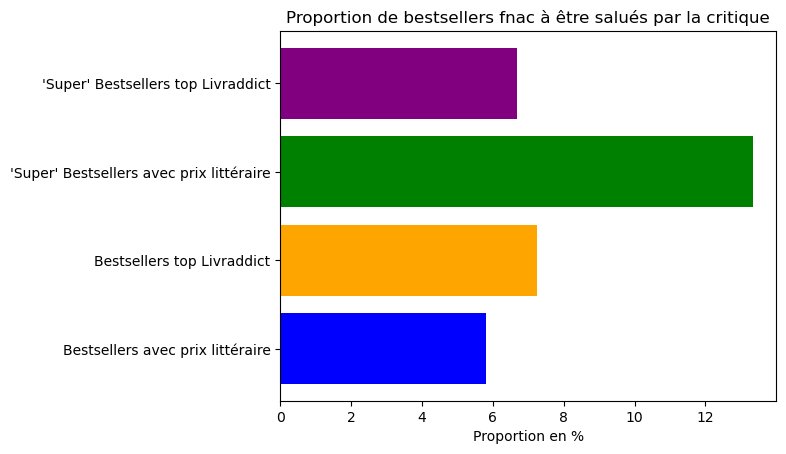

In [24]:
categories = ["Bestsellers avec prix littéraire","Bestsellers top Livraddict", "'Super' Bestsellers avec prix littéraire", "'Super' Bestsellers top Livraddict" ]
values = [5.797101, 7.246377, 13.333333, 6.666667 ]
plt.barh(categories, values, color=['blue', 'orange', 'green', 'purple'])

plt.xlabel('Proportion en %')
plt.title('Proportion de bestsellers fnac à être salués par la critique')
plt.show()

Il n'y a pas de différence flagrante de proportion de livres faisant partie du top Livraddict entre l'ensemble des bestsellers et les "super bestsellers". Par contre, il y a une différence plus flagrante en terme de prix littéraire, d'environ sept points de pourcentages. Toutefois, cette différence est évidemment à nuancer étant donné la taille des échantillons. Il n'en reste qu'il est intéressant d'observer que les plus gros bestsellers ont une propension plus grande à avoir été primés que les autres bestsellers, même si la proportion de livres primés reste plutôt faible.

Les livres les plus empruntés en bibliothèque et leur reconnaissance:

In [25]:
final_bibli = final_data[final_data['Top_bibliothèque']==1]

In [26]:
final_bibli.loc[:, 'Reconnu_par'] = final_bibli.apply(reconnu_bis, axis=1)

In [27]:
reconnus = final_bibli['Reconnu_par'].value_counts()
reconnus_proportions = final_bibli['Reconnu_par'].value_counts(normalize=True) * 100

print("Nombre de livres en 2023 parmi les plus empruntés dans les bibliothèques de Paris ayant obtenu un prix ou des bonnes notes d'internautes:")
print(reconnus)
print("\nProportion de livres en 2023 parmi les plus empruntés dans les bibliothèques de Paris ayant obtenu un prix ou des bonnes notes d'internautes (%):")
print(reconnus_proportions)

Nombre de livres en 2023 parmi les plus empruntés dans les bibliothèques de Paris ayant obtenu un prix ou des bonnes notes d'internautes:
Reconnu_par
Aucun       80
Critique     6
Name: count, dtype: int64

Proportion de livres en 2023 parmi les plus empruntés dans les bibliothèques de Paris ayant obtenu un prix ou des bonnes notes d'internautes (%):
Reconnu_par
Aucun       93.023256
Critique     6.976744
Name: proportion, dtype: float64


Dans cette base, il est frappant de constater qu'il n'y a aucun livre salué par les lecteurs de Livraddict, seulement certains ayant obtenus un prix, et en pourcentage à peu près autant que les bestsellers ( et non pas les superbestsellers fnac). En effet, à peu près 7% des livres de la base des bibliothèques de Paris ont été salués par la critique. Cela s'explique sûrement par la surreprésentation dans cette base de mangas ou de tomes de bandes dessinée, sûrement empruntés par un public jeune, et moins salués par les prix littéraire. On pourrait donc comparer en enlevant toutes les données dont le genre est la bande dessinée ou l'album ( en ne gardant que les "purs livres", et plus précisément que les "Livres adultes").

In [28]:
new_final_bibli = final_bibli[final_bibli['type_de_document'] in ["Livre adulte", "Bande dessinée adulte"]]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [119]:
reconnus = new_final_bibli['Reconnu_par'].value_counts()
reconnus_proportions = new_final_bibli['Reconnu_par'].value_counts(normalize=True) * 100

print("Nombre de livres en 2023 parmi les plus empruntés dans les bibliothèques de Paris ayant obtenu un prix ou des bonnes notes d'internautes:")
print(reconnus)
print("\nProportion de livres en 2023 parmi les plus empruntés dans les bibliothèques de Paris ayant obtenu un prix ou des bonnes notes d'internautes (%):")
print(reconnus_proportions)

Nombre de livres en 2023 parmi les plus empruntés dans les bibliothèques de Paris ayant obtenu un prix ou des bonnes notes d'internautes:
Reconnu_par
Aucun       33
Critique     5
Name: count, dtype: int64

Proportion de livres en 2023 parmi les plus empruntés dans les bibliothèques de Paris ayant obtenu un prix ou des bonnes notes d'internautes (%):
Reconnu_par
Aucun       86.842105
Critique    13.157895
Name: proportion, dtype: float64


En prenant que les types de livres pouvant techniquement être primés, on trouve donc un pourcentage proche de celui des "super bestsellers" de la Fnac. La différence était donc peut-être liée seulement à la surreprésentation d'un public plus jeune.

Ayant un classement de la popularité des ouvrages, on se demande tout de même si la place dans le classement joue sur le fait d'avoir obtenu un prix. Pour cela, nous créons une nouvelle variable de classement pour avoir un classement sans trous malgré le fait qu'on ait conservé que la catégorie "Livres adultes".

A LA FIN: PARENTHESE SUR DES AUTRES CARACTERISTIQUES DES OUVRAGES


--- Fréquence des auteurs ---
Nombre de livres par auteur :
Auteur
Oda,  Eiichiro         7
Kishimoto,  Masashi    5
Shirai,  Kaiu          4
Sarah Rivens           3
Amélie Nothomb         3
                      ..
Benoît Sagaro          1
John Gwynne            1
Joe Todd-Stanton       1
Hugo Micheron          1
Ellie Midwood          1
Name: count, Length: 446, dtype: int64


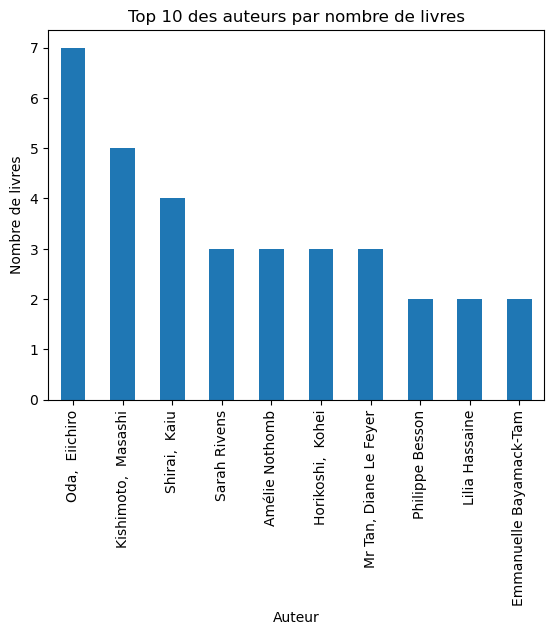

"\nLes auteurs Sarah Rivens et Mr Tan se démarquent avec 4 livres chacun, suivis par Sibylle Grimbert et Neige Sinno avec 3 livres. Cependant, la majorité des 204 auteurs n'ont écrit qu'un seul livre, illustrant une forte diversité mais une faible répétition dans les contributions des auteurs.\n"

In [ ]:
# ------------ Fréquence des auteurs -------------
print("\n--- Fréquence des auteurs ---")

auteur_counts = final_data['Auteur'].value_counts()

print("Nombre de livres par auteur :")
print(auteur_counts)

auteur_counts.head(10).plot(kind='bar', title='Top 10 des auteurs par nombre de livres', ylabel='Nombre de livres', xlabel='Auteur')
plt.show()


Les auteurs Oda Eiichiro, Kishimoto Masachi et Shirai Kaiu se démarquent avec plus 4 livres chacun. Notons qu'il s'agit de trois mangaka. La majorité des 204 auteurs n'ont écrit qu'un seul livre, illustrant une forte diversité mais une faible répétition dans les contributions des auteurs.